In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import dateutil.parser

pd.set_option('display.max_columns', 100)

odata = pd.read_csv("SFBay.csv", sep=";")

In [2]:
odata

,TimeStamp,Station.Number,Distance.from.36,Depth,Discrete.Chlorophyll,Chlorophyll.a.a.PHA,Fluorescence,Calculated.Chlorophyll,Discrete.Oxygen,Oxygen.Electrode.Output,Oxygen.Saturation.percent,Calculated.Oxygen,Discrete.SPM,Optical.Backscatter,Calculated.SPM,Measured.Extinction.Coefficient,Calculated.Extinction.Coefficient,Salinity,Temperature,Sigma.t,Nitrite,Nitrate...Nitrite,Ammonium,Phosphate,Silicate
0,1969-04-10 16:15:00,4.0,119.90,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.30,13.10,NaN,NaN,NaN,NaN,NaN,NaN
1,1969-04-10 16:16:00,4.0,119.90,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.30,13.10,NaN,0.7,NaN,NaN,1.6,236.0
2,1969-04-10 16:17:00,4.0,119.90,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.30,13.00,NaN,NaN,NaN,NaN,NaN,NaN
3,1969-04-10 16:18:00,4.0,119.90,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.30,13.00,NaN,NaN,NaN,NaN,NaN,NaN
4,1969-04-10 16:30:00,5.0,115.63,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.30,14.10,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194640,2014-02-24 12:15:00,18.0,54.95,28.0,NaN,NaN,0.29,3.4,NaN,7.8,89.0,7.8,NaN,1.23,47.0,NaN,NaN,30.38,12.68,22.87,NaN,NaN,NaN,NaN,NaN
194641,2014-02-24 12:15:00,18.0,54.95,29.0,NaN,NaN,0.29,3.5,NaN,7.8,89.0,7.8,NaN,1.19,45.0,NaN,NaN,30.36,12.69,22.86,NaN,NaN,NaN,NaN,NaN
194642,2014-02-24 12:15:00,18.0,54.95,30.0,NaN,NaN,0.30,3.5,NaN,7.8,89.0,7.8,NaN,1.26,48.0,NaN,NaN,30.41,12.68,22.90,NaN,NaN,NaN,NaN,NaN
194643,2014-02-24 12:15:00,18.0,54.95,31.0,NaN,NaN,0.30,3.6,NaN,7.8,89.0,7.8,NaN,1.29,49.0,NaN,NaN,30.37,12.68,22.87,NaN,NaN,NaN,NaN,NaN


In [3]:
missing = odata[odata['Calculated.Chlorophyll'].isnull() | odata['Calculated.Oxygen'].isnull() | odata['Calculated.SPM'].isnull()]
ccmissing = odata[odata['Calculated.Chlorophyll'].isnull()]
comissing = odata[odata['Calculated.Oxygen'].isnull()]
spmmissing = odata[odata['Calculated.SPM'].isnull()]    

print(missing.shape)
print(ccmissing.shape)
print(comissing.shape)
print(spmmissing.shape)

missing

(54976, 25)
(11623, 25)
(48655, 25)
(35808, 25)


,TimeStamp,Station.Number,Distance.from.36,Depth,Discrete.Chlorophyll,Chlorophyll.a.a.PHA,Fluorescence,Calculated.Chlorophyll,Discrete.Oxygen,Oxygen.Electrode.Output,Oxygen.Saturation.percent,Calculated.Oxygen,Discrete.SPM,Optical.Backscatter,Calculated.SPM,Measured.Extinction.Coefficient,Calculated.Extinction.Coefficient,Salinity,Temperature,Sigma.t,Nitrite,Nitrate...Nitrite,Ammonium,Phosphate,Silicate
0,1969-04-10 16:15:00,4.0,119.90,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.30,13.10,NaN,NaN,NaN,NaN,NaN,NaN
1,1969-04-10 16:16:00,4.0,119.90,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.30,13.10,NaN,0.7,NaN,NaN,1.6,236.0
2,1969-04-10 16:17:00,4.0,119.90,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.30,13.00,NaN,NaN,NaN,NaN,NaN,NaN
3,1969-04-10 16:18:00,4.0,119.90,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.30,13.00,NaN,NaN,NaN,NaN,NaN,NaN
4,1969-04-10 16:30:00,5.0,115.63,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.30,14.10,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193765,2014-01-24 12:22:00,25.0,32.84,4.0,NaN,NaN,0.35,2.7,NaN,NaN,NaN,NaN,NaN,NaN,23.0,NaN,NaN,30.81,11.69,23.39,NaN,NaN,NaN,NaN,NaN
193766,2014-01-24 12:22:00,25.0,32.84,5.0,NaN,NaN,0.35,2.7,NaN,NaN,NaN,NaN,NaN,NaN,23.0,NaN,NaN,30.81,11.69,23.39,NaN,NaN,NaN,NaN,NaN
193767,2014-01-24 12:22:00,25.0,32.84,6.0,NaN,NaN,0.35,2.7,NaN,NaN,NaN,NaN,NaN,NaN,23.0,NaN,NaN,30.81,11.69,23.39,NaN,NaN,NaN,NaN,NaN
193768,2014-01-24 12:22:00,25.0,32.84,7.0,NaN,NaN,0.35,2.6,NaN,NaN,NaN,NaN,NaN,NaN,23.0,NaN,NaN,30.81,11.69,23.39,NaN,NaN,NaN,NaN,NaN


In [4]:
notmissing = odata[odata['Calculated.Chlorophyll'].notnull() & odata['Calculated.Oxygen'].notnull() & odata['Calculated.SPM'].notnull()]
notmissing

,TimeStamp,Station.Number,Distance.from.36,Depth,Discrete.Chlorophyll,Chlorophyll.a.a.PHA,Fluorescence,Calculated.Chlorophyll,Discrete.Oxygen,Oxygen.Electrode.Output,Oxygen.Saturation.percent,Calculated.Oxygen,Discrete.SPM,Optical.Backscatter,Calculated.SPM,Measured.Extinction.Coefficient,Calculated.Extinction.Coefficient,Salinity,Temperature,Sigma.t,Nitrite,Nitrate...Nitrite,Ammonium,Phosphate,Silicate
40923,1993-01-26 15:18:00,18.0,54.95,1.0,1.1,0.73,0.35,1.0,9.3,8.7,96.0,9.5,8.9,0.12,11.0,1.3,NaN,16.38,10.92,12.33,0.68,40.95,7.73,2.59,131.78
40924,1993-01-26 15:18:00,18.0,54.95,2.0,NaN,NaN,0.35,1.0,NaN,8.7,97.0,9.6,NaN,0.12,11.0,NaN,NaN,16.50,10.93,12.43,NaN,NaN,NaN,NaN,NaN
40925,1993-01-26 15:18:00,18.0,54.95,3.0,NaN,NaN,0.35,1.0,NaN,8.7,97.0,9.6,NaN,0.11,10.0,NaN,NaN,16.70,10.94,12.58,NaN,NaN,NaN,NaN,NaN
40926,1993-01-26 15:18:00,18.0,54.95,4.0,NaN,NaN,0.34,1.0,NaN,8.6,96.0,9.5,NaN,0.10,10.0,NaN,NaN,17.02,10.94,12.82,NaN,NaN,NaN,NaN,NaN
40927,1993-01-26 15:18:00,18.0,54.95,5.0,NaN,NaN,0.34,1.0,NaN,8.7,98.0,9.6,NaN,0.09,9.0,NaN,NaN,18.39,10.87,13.90,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194640,2014-02-24 12:15:00,18.0,54.95,28.0,NaN,NaN,0.29,3.4,NaN,7.8,89.0,7.8,NaN,1.23,47.0,NaN,NaN,30.38,12.68,22.87,NaN,NaN,NaN,NaN,NaN
194641,2014-02-24 12:15:00,18.0,54.95,29.0,NaN,NaN,0.29,3.5,NaN,7.8,89.0,7.8,NaN,1.19,45.0,NaN,NaN,30.36,12.69,22.86,NaN,NaN,NaN,NaN,NaN
194642,2014-02-24 12:15:00,18.0,54.95,30.0,NaN,NaN,0.30,3.5,NaN,7.8,89.0,7.8,NaN,1.26,48.0,NaN,NaN,30.41,12.68,22.90,NaN,NaN,NaN,NaN,NaN
194643,2014-02-24 12:15:00,18.0,54.95,31.0,NaN,NaN,0.30,3.6,NaN,7.8,89.0,7.8,NaN,1.29,49.0,NaN,NaN,30.37,12.68,22.87,NaN,NaN,NaN,NaN,NaN


In [5]:
from90 = odata.copy(deep=True)
from90["MonthYear"] = odata["TimeStamp"].apply(lambda x: x[:7])

from90 = from90.groupby(["MonthYear", "Station.Number"]).mean()
from90 = from90.reset_index(level=['Station.Number'])
from90['Station.Number'] = from90['Station.Number'].astype(int)

from90.index = pd.to_datetime(from90.index)
from90 = from90[from90.index >= dateutil.parser.parse("1990-01-01")]

from90

,Station.Number,Distance.from.36,Depth,Discrete.Chlorophyll,Chlorophyll.a.a.PHA,Fluorescence,Calculated.Chlorophyll,Discrete.Oxygen,Oxygen.Electrode.Output,Oxygen.Saturation.percent,Calculated.Oxygen,Discrete.SPM,Optical.Backscatter,Calculated.SPM,Measured.Extinction.Coefficient,Calculated.Extinction.Coefficient,Salinity,Temperature,Sigma.t,Nitrite,Nitrate...Nitrite,Ammonium,Phosphate,Silicate
MonthYear,,,,,,,,,,,,,,,,,,,,,,,,
1990-01-01,2,127.71,5.500000,NaN,NaN,0.475000,1.070000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,NaN,0.602000,9.825000,0.278571,NaN,NaN,NaN,NaN,NaN
1990-01-01,4,119.90,5.500000,0.70,0.270,0.390000,0.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,NaN,1.962000,9.603000,1.279000,NaN,NaN,NaN,NaN,NaN
1990-01-01,6,110.90,6.000000,0.30,0.145,0.337273,0.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.30,NaN,4.929091,9.434545,3.611818,NaN,NaN,NaN,NaN,NaN
1990-01-01,8,99.77,10.000000,1.15,0.265,0.387895,0.868421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.70,NaN,12.851053,9.591579,9.763158,NaN,NaN,NaN,NaN,NaN
1990-01-01,11,89.77,6.000000,0.70,0.175,0.401818,0.881818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,NaN,17.061818,9.854545,13.004545,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-02-01,34,3.53,3.923077,4.40,0.840,0.350769,4.092308,NaN,8.415385,96.153846,8.346154,NaN,0.561538,19.000000,0.88,NaN,28.836923,13.503077,21.525385,NaN,NaN,NaN,NaN,NaN
2014-02-01,35,1.66,4.500000,NaN,NaN,0.401250,4.681250,NaN,8.425000,96.000000,8.350000,NaN,0.585625,20.000000,0.99,NaN,28.127500,13.495625,20.978750,NaN,NaN,NaN,NaN,NaN
2014-02-01,36,0.00,3.583333,6.35,0.825,0.493333,5.883333,8.3,8.400000,95.750000,8.325000,21.575,0.660000,23.083333,1.04,NaN,27.600000,13.672500,20.537500,NaN,NaN,NaN,NaN,NaN


In [6]:
missing90 = from90[from90['Calculated.Chlorophyll'].isnull() | from90['Calculated.Oxygen'].isnull() | from90['Calculated.SPM'].isnull()]
missing90.shape

(1612, 24)

In [12]:
from90 = from90.groupby("Station.Number").apply(lambda bystation: bystation.groupby("Depth").apply(lambda depth: depth.interpolate(axis=1)))
from90['Station.Number'] = from90['Station.Number'].astype(int)

# from90 = from90.groupby("Station.Number").apply(lambda bystation: bystation.interpolate(axis=1, limit_direction="backward"))
# from90.loc[from90['Station.Number'] == 4]

from90

,Station.Number,Distance.from.36,Depth,Discrete.Chlorophyll,Chlorophyll.a.a.PHA,Fluorescence,Calculated.Chlorophyll,Discrete.Oxygen,Oxygen.Electrode.Output,Oxygen.Saturation.percent,Calculated.Oxygen,Discrete.SPM,Optical.Backscatter,Calculated.SPM,Measured.Extinction.Coefficient,Calculated.Extinction.Coefficient,Salinity,Temperature,Sigma.t,Nitrite,Nitrate...Nitrite,Ammonium,Phosphate,Silicate
MonthYear,,,,,,,,,,,,,,,,,,,,,,,,
1990-01-01,2,127.71,5.500000,3.82500,2.1500,0.475000,1.070000,1.561250,2.052500,2.543750,3.035000,3.526250,4.017500,4.508750,5.000000,2.801000,0.602000,9.825000,0.278571,0.278571,0.278571,0.278571,0.278571,0.278571
1990-01-01,4,119.90,5.500000,0.70000,0.2700,0.390000,0.900000,1.287500,1.675000,2.062500,2.450000,2.837500,3.225000,3.612500,4.000000,2.981000,1.962000,9.603000,1.279000,1.279000,1.279000,1.279000,1.279000,1.279000
1990-01-01,6,110.90,6.000000,0.30000,0.1450,0.337273,0.700000,1.025000,1.350000,1.675000,2.000000,2.325000,2.650000,2.975000,3.300000,4.114545,4.929091,9.434545,3.611818,3.611818,3.611818,3.611818,3.611818,3.611818
1990-01-01,8,99.77,10.000000,1.15000,0.2650,0.387895,0.868421,1.097368,1.326316,1.555263,1.784211,2.013158,2.242105,2.471053,2.700000,7.775526,12.851053,9.591579,9.763158,9.763158,9.763158,9.763158,9.763158,9.763158
1990-01-01,11,89.77,6.000000,0.70000,0.1750,0.401818,0.881818,1.271591,1.661364,2.051136,2.440909,2.830682,3.220455,3.610227,4.000000,10.530909,17.061818,9.854545,13.004545,13.004545,13.004545,13.004545,13.004545,13.004545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-02-01,34,3.53,3.923077,4.40000,0.8400,0.350769,4.092308,6.253846,8.415385,96.153846,8.346154,4.453846,0.561538,19.000000,0.880000,14.858462,28.836923,13.503077,21.525385,21.525385,21.525385,21.525385,21.525385,21.525385
2014-02-01,35,1.66,4.500000,3.13375,1.7675,0.401250,4.681250,6.553125,8.425000,96.000000,8.350000,4.467813,0.585625,20.000000,0.990000,14.558750,28.127500,13.495625,20.978750,20.978750,20.978750,20.978750,20.978750,20.978750
2014-02-01,36,0.00,3.583333,6.35000,0.8250,0.493333,5.883333,8.300000,8.400000,95.750000,8.325000,21.575000,0.660000,23.083333,1.040000,14.320000,27.600000,13.672500,20.537500,20.537500,20.537500,20.537500,20.537500,20.537500


In [11]:
missing90 = from90[from90['Calculated.Chlorophyll'].isnull() | from90['Calculated.Oxygen'].isnull() | from90['Calculated.SPM'].isnull()]
missing90.shape

(0, 24)

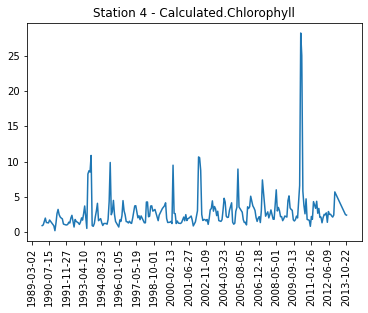

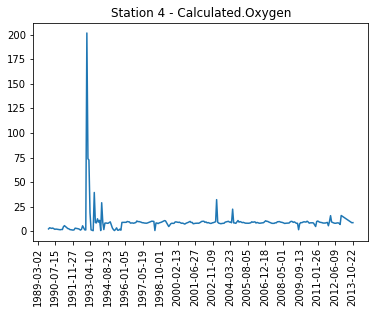

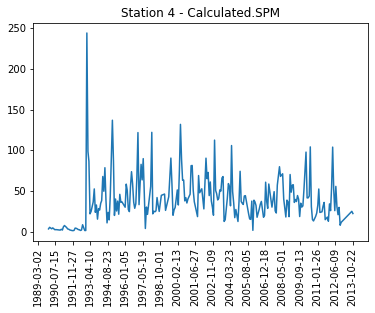

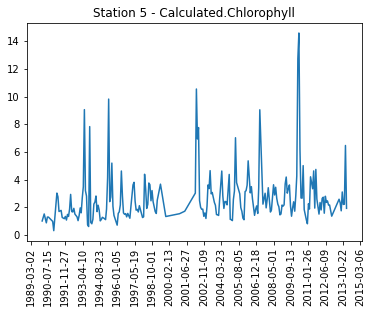

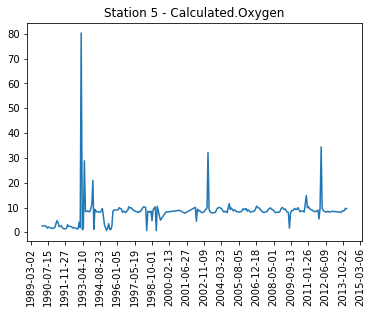

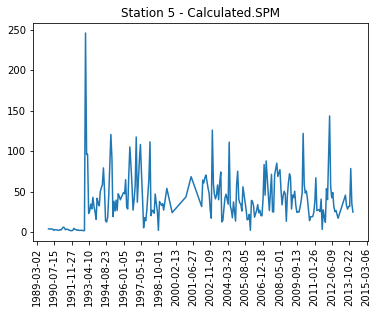

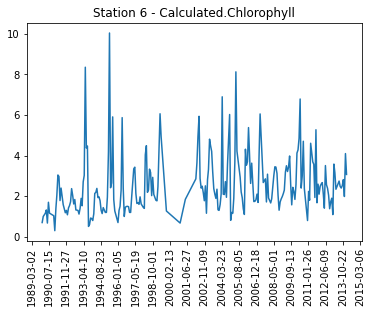

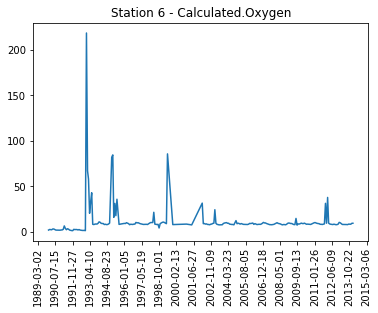

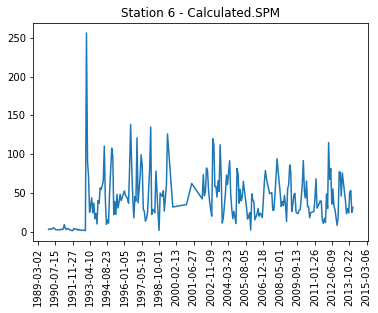

In [13]:
only = ['Calculated.Chlorophyll', 'Calculated.Oxygen', 'Calculated.SPM']
stations = [4, 5, 6]

for station in stations:
    for column in from90.columns:
        if column not in only:
            continue
        else:
            plt.plot(from90.loc[from90['Station.Number'] == station].index, from90.loc[from90['Station.Number'] == station][column])
            ax = plt.gca()
            ax.xaxis.set_major_locator(ticker.MaxNLocator(22))
            plt.title("Station " + str(station) + " - " + column)
            plt.xticks(rotation=90)
            plt.savefig("figures/{}.png".format(column), dpi=300)
            plt.show()